In [2]:
import numpy as np
import mne
from mne.datasets import sample

In [4]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
# use the first 20s of data
tmin = 0
tmax = 20
# save memory by cropping the raw data before loading it.
raw = mne.io.read_raw_fif(raw_fname)
raw.crop(tmin,tmax).load_data()
# pick a subset of channels 
selection = mne.read_selection('Left-temporal')
picks = mne.pick_types(raw.info,meg='mag',eeg=False,eog=False,stim=False,exclude='bads',selection=selection)

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 12012  =      0.000 ...    20.000 secs...


Effective window size : 3.410 (s)


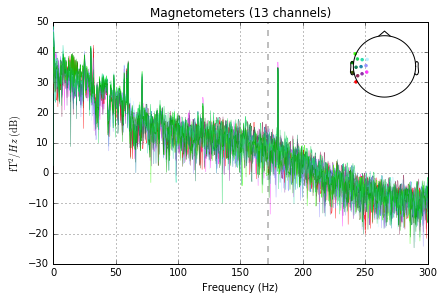

In [6]:
raw.plot_psd(area_mode='range',tmax=10.0,picks=picks);

25 events found
Event IDs: [ 1  2  3  4  5 32]
25 events found
Event IDs: [ 1  2  3  4  5 32]
Effective window size : 10.010 (s)


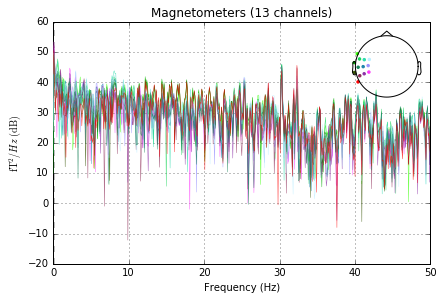

In [7]:
raw.resample(100,npad='auto') # sampling frequency to 100Hz
raw.plot_psd(area_mode='range',tmax=10.0,picks=picks);

To avoid this reduction in precision, the suggested pipeline for processing final data to be analyzed is:
>
1. low-pass the data with mne.io.Raw.filter().
2. Extract epochs with mne.Epochs.
3. Decimate the Epochs object using mne.Epochs.decimate() or the decim argument to the mne.Epochs object.

We also provide the convenience methods mne.Epochs.resample() and mne.Evoked.resample() to downsample or upsample data, but these are less optimal because they will introduce edge artifacts into every epoch, whereas filtering the raw data will only introduce edge artifacts only at the start and end of the recording.

